# Cats & Dogs Image Classification

    - This example implementation deals with techniques to handle scenario when the image data is lesser
        - Step 1: Basic model
        - Step 2: Data Augmentantion
        - Step 3: Pre-trained network 
        - Step 4: Pre-trained network tuned further
    
    - Good page on image data at https://gengo.ai/datasets/20-best-image-datasets-for-computer-vision/

# Image data setup & download

    - Once we have the data downloaded we will split the data into 3 folders
        - Training
        - Validation
        - Testing
        
    - You could do them manually OR via a program

In [1]:
import os

base_dir = '.\catsanddogs\dataset'

train_dir = os.path.join(base_dir,'training_set') 
train_dogs_dir = os.path.join(train_dir,'dogs') 
train_cats_dir = os.path.join(train_dir,'cats') 

validation_dir = os.path.join(base_dir,'test_set') 
validation_dogs_dir = os.path.join(validation_dir,'dogs') 
validation_cats_dir = os.path.join(validation_dir,'cats') 

test_dir = os.path.join(base_dir,'test_set') 
test_dogs_dir = os.path.join(test_dir,'dogs') 
test_cats_dir = os.path.join(test_dir,'cats') 

test_dir = os.path.join(base_dir,'test')

#print files count in each dire
print ('Number of files in dogs training images directory are ',len(os.listdir(train_dogs_dir)))
print ('Number of files in cats training images directory are ',len(os.listdir(train_cats_dir)))

print ('Number of files in dogs validation directory are ',len(os.listdir(validation_dogs_dir)))
print ('Number of files in cats validation directory are ',len(os.listdir(validation_cats_dir)))

print ('Number of files in dogs test directory are ',len(os.listdir(test_dogs_dir)))
print ('Number of files in cats test directory are ',len(os.listdir(test_cats_dir)))

Number of files in dogs training images directory are  100
Number of files in cats training images directory are  100
Number of files in dogs validation directory are  10
Number of files in cats validation directory are  10
Number of files in dogs test directory are  10
Number of files in cats test directory are  10


# Step 1 - Basic CNN Model

# Images data pre-processing

    - Once downloaded & split into folders we have the images as JPEG files. However before we can feed them into the network we need to convert them into right sized tensors; rough steps we would follow are
    
        - load jpeg files from disk
        - decode jpeg files to pixels grid
        - convert pixels grid to floating point tensors
        - rescale the pixel values (between 0 and 255) to values (between 0 and 1)

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Using TensorFlow backend.


Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Step 1.1. - Building & Training the Model

    - Tip: When using Conv & MaxPooling the depth of feature map would increase through layers and length of feature map would reduce. This should be a good pattern when you do summary.

In [4]:
import tensorflow as tf
print (tf.__version__)

2.0.0-rc1


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(40, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(80, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(160, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(200, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data=validation_generator, validation_steps=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 40)      1120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 80)        28880     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 160)       115360    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 160)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 200)      

W1007 19:09:22.975569  5604 deprecation.py:323] From C:\MachineLearning\anaconda\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 69/100 [===================>..........] - ETA: 25s - loss: 0.6988 - accuracy: 0.5493

KeyboardInterrupt: 

## Step 1.2 - Save the Trained Model

In [4]:
from pickle import dump
model.save('cats-dogs-cnn-model1.h5')

## Step 1.3 Visualizing the training metadata

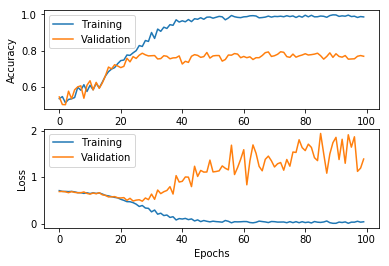

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure()

ax1 = figure.add_subplot(211)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training','Validation'])

ax1 = figure.add_subplot(212)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Training','Validation'])

plt.show()

## Step 1.4 - Load the Trained Model

In [2]:
from tf.keras.models import load_model
lmodel = load_model('cats-dogs-cnn-model1.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Step 1.5 - Testing the Trained Model - WIP


## Step 2 - Use Data Augmentation to increase the training data

    - ImageDataGenerator would randomly apply these transformations on the images and generate them in specified batch size

In [10]:
augmented_image_datagen = ImageDataGenerator(
                            rotation_range=50,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

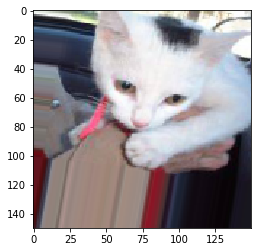

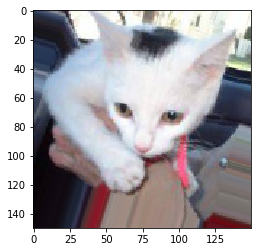

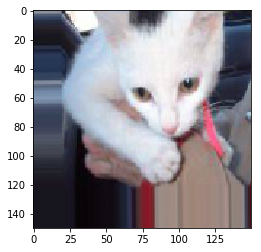

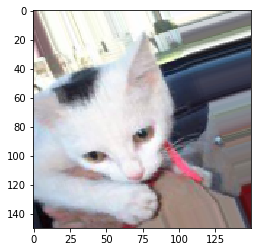

In [14]:
# Let's load a sample image and apply this image generator on it.
from tf.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
%matplotlib inline

#get all filenames from training images of cats
fileNames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

#select one cat image name for augmentation
sample_image_path = fileNames[3] 

#load sample image
sample_image = image.load_img(sample_image_path, target_size=(150,150))

#converts into numpy array of size (150,150,3)
x = image.img_to_array(sample_image)

#reshapes into numpy array of size (1,150,150,3)
x = x.reshape((1,)+x.shape)

i = 0
for batch in augmented_image_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplt = plt.imshow(image.array_to_img(batch[0]))
    i=i+1
    if (i==4):
        break
plt.show()

## Step 2.2. - Apply Image Augmentation on Training Images & Train the model

    - Image Augmentation is a technique in which we alter the shape of input images by rotating them, changing width, height, zoom, flip etc. This allows us to increase a small dataset to a slightly bigger data set.
    - Please note that although augmentation changes images to an extent but they are still related to the original shape the impact is not that dramatic, i.e. in terms of increasing the data size.

In [8]:
from tf.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                            rotation_range=50,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest',
                            rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Step 2.3. - Building & Training the Model

    - Tips: 
        - When using Conv & MaxPooling the depth of feature map would increase through layers and length of feature map would reduce. This should be a good pattern when you do summary.
        - Each Conv2D layer accepts a Rank 3 tensor
        - Layer 1 which accepts image which is represented as Rank 3 tensor (Height, Weight, Channel)
        - Each layer takes input a tensor and outputs a tensor
        - Number of filters in any layer would determine the channels in the output tensor. For e.g. if a layer has 10 filters then it's output tensor would have 10 channels, like (?,?,10)
        - Filters in convulation layers have two specific advantages:
            - Filters learn localized representation of images; for e.g. an edge, a line, ear, nose etc. Since they learn local patterns they can apply those learnings when they see those patterns again.
            - In a MLP layer, all inputs are understood as once hence the reusability when presented with new data becomes zero

## Configure Callbacks which would be executed during the training phase

In [37]:
from tf.keras.callbacks import EarlyStopping
from tf.keras.callbacks import ModelCheckpoint
from tf.keras.callbacks import ReduceLROnPlateau
from tf.keras.callbacks import TensorBoard

def create_callbacks():
    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5)
    ]
    return callbacks

In [38]:
cbk = create_callbacks()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(40, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(80, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(160, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(200, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50, callbacks=cbk)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 148, 148, 40)      1120      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 74, 74, 40)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 74, 74, 40)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 72, 72, 80)        28880     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 36, 36, 80)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 36, 36, 80)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 34, 34, 160)       115360    
__________

# Step 2.4 Save the New Model

In [39]:
from pickle import dump
model.save('cats-dogs-cnn-model2.h5')

# Step 2.5 Visualizing Training Performance

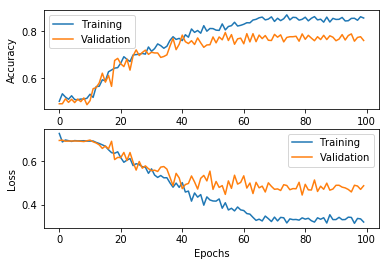

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure()

ax1 = figure.add_subplot(211)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training','Validation'])

ax1 = figure.add_subplot(212)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Training','Validation'])

plt.show()